In [25]:
import numpy as np
from numpy.linalg import qr, svd, norm
import time
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [26]:
def rsvd_alg(k, p , A, iters, use_power):
    """
    Implements randomized SVD algorithm
    Matrix A is n * m where m <= n. Otherwise, transpose A.
    Set Omega's dimensions to be min(m,n)
    One enhancement is the use of a power iteration - this significantly improves accuracy up to values 3 or 4.
    """
    
    # this ensures that m <= n
    if(A.shape[0] > A.shape[1]):
        A = A.T
    
    Omega = np.random.randn(A.shape[0], k + p)
    
    iters = iters * use_power  # set to 0 if False, otherwise stays the same
    
    for i in range(iters):
        Omega = np.dot(A,np.dot(A.T,Omega))
    
    Q, R = qr(Omega)
    B = np.dot(Q.T,A)
    U,S,V = svd(B)
    U = np.dot(Q,U)
    
    return U,S,V

In [27]:
def computation_results(k, p, dim_list):
    """
    Store time to completion and normed errors in a dictionary
    Currently the power iterations are inputted manually. Next version is to generalize for any power iteration
    
    1) Compare error from RSVD algorithm for each power iteration to SVD singular value, the theoretical minimum
    2) Calculate time to completion for SVD and various RSVD algorithms
    """
    
    results = dict.fromkeys(dim_list, 0)

    for dim in dim_list:
        results[dim] = {
            'rsvd5':0, 'rsvd3':0,'rsvd':0, 'svd':0,'err':0,'err3':0,'err5':0
        }

        n = m = dim
        A = np.random.normal(0, 1, m * n).reshape(m,n)

        start = time.time()
        u_, s_, v_ = svd(A)
        end = time.time()

        results[dim]['svd'] = round(end - start,4)

        start = time.time()
        U,S,V = rsvd_alg(k, p, A, 0, use_power = False)
        end = time.time()

        results[dim]['rsvd'] = round(end - start,4)
        results[dim]['err'] = round(norm(s_[:(k+p)] - S),4)

        start = time.time()
        U,S,V = rsvd_alg(k, p, A, 3, use_power = True)
        end = time.time()
        results[dim]['rsvd3'] = round(end - start,4)
        results[dim]['err3'] = round(norm(s_[:(k+p)] - S),4)

        start = time.time()
        U,S,V = rsvd_alg(k, p, A, 5, use_power = True)
        end = time.time()
        results[dim]['rsvd5'] = round(end - start,4)
        results[dim]['err5'] = round(norm(s_[:(k+p)] - S),4)
    
    return results
    

In [28]:
# initialize parameters
k = 10
p = 5
dim_list = np.linspace(50,500,500/50)

# store results in a dict and convert to dataframe for plotting
results = computation_results(k, p, dim_list)
df = pd.DataFrame(results).transpose()

In [29]:
df_times = np.log(df.iloc[:,3:7])
df_norms = df.iloc[:,0:3]

In [30]:
def plot_time_to_completion(df):

    plt.plot(df.index,df.rsvd,label='RSVD')
    plt.plot(df.index,df.rsvd3,label='RSVD - k=3')
    plt.plot(df.index,df.rsvd5,label='RSVD - k=5')
    plt.plot(df.index,df.svd, label='SVD')
    plt.title("Comparing SVD algorithms\nTime to Completion",size=16)
    plt.ylabel("log(Time)",size=14)
    plt.xlabel("Number of dimensions",size=14)
    plt.legend(loc="best")
    plt.show()

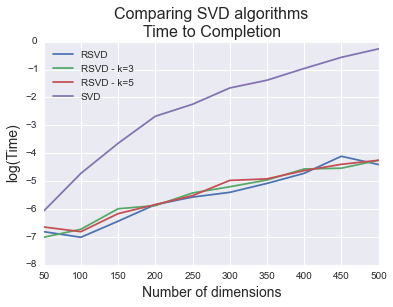

In [31]:
plot_time_to_completion(df_times)

In [32]:
def plot_norm_error(df):
    
    plt.plot(df.index,df.err,label='RSVD')
    plt.plot(df.index,df.err3,label='RSVD - k = 3')
    plt.plot(df.index,df.err5,label='RSVD - k = 5')
    plt.title("Comparing SVD algorithms\nFrobenius Norm",size=16)
    plt.legend(loc='best')
    plt.ylabel("Error",size=14)
    plt.xlabel("Number of dimensions",size=14)
    plt.show()

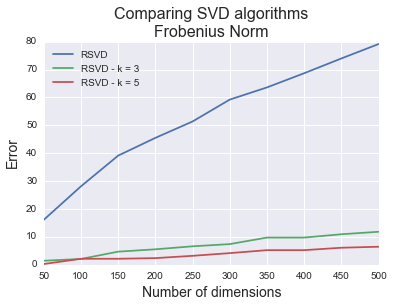

In [33]:
plot_norm_error(df_norms)